In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Group selection

In [ ]:
data = np.load("/content/drive/MyDrive/GPCRBert/inference result/proteins_NPXXY_(head0).npy", allow_pickle=True)

name_list = ['aa2ar', 'adrb1', 'adrb2', 'ox1r', 'ox2r', 'opsd']
choose = 5

index_list = []
for i in range(data.shape[0]):
    if name_list[choose] in data[i]['pdb']:
        index_list.append(i)

print(index_list)
print(len(index_list))

data = data[index_list]

# for i in range(len(data)):
#   print(data[i]['seq'])
#   print(data[i]['pdb'])

[29, 30, 51, 68, 128, 129, 130, 131, 132, 133, 134, 135, 136, 140, 141, 142, 143, 144, 145, 152]
20


### For first X

Data number : 0, head number : 0
pdb : opsd_bovin_6FUF_prot.pdb
The Index of N of NPXXY is 301 in NPJJYI
 Most Correlated sequence is P in PJJYIM at Index: 301. Attention Weight: 0.01721770316362381
 Second Most Correlated sequence is M in MMNKQF at Index: 306. Attention Weight: 0.013988432474434376
 Third Most Correlated sequence is T in TSAVYN at Index: 295. Attention Weight: 0.011022623628377914
 Fourth Most Correlated sequence is C in CMJJJJ at Index: 314. Attention Weight: 0.01042498741298914
 Fifth Most Correlated sequence is L in LGFPIN at Index: 48. Attention Weight: 0.010145412757992744
Data number : 1, head number : 0
pdb : opsd_bovin_6QNO_prot.pdb
The Index of N of NPXXY is 301 in NPJJYI
 Most Correlated sequence is P in PJJYIM at Index: 301. Attention Weight: 0.01642771251499653
 Second Most Correlated sequence is M in MMNKQF at Index: 306. Attention Weight: 0.013836636207997799
 Third Most Correlated sequence is T in TSAVYN at Index: 295. Attention Weight: 0.01064847689121

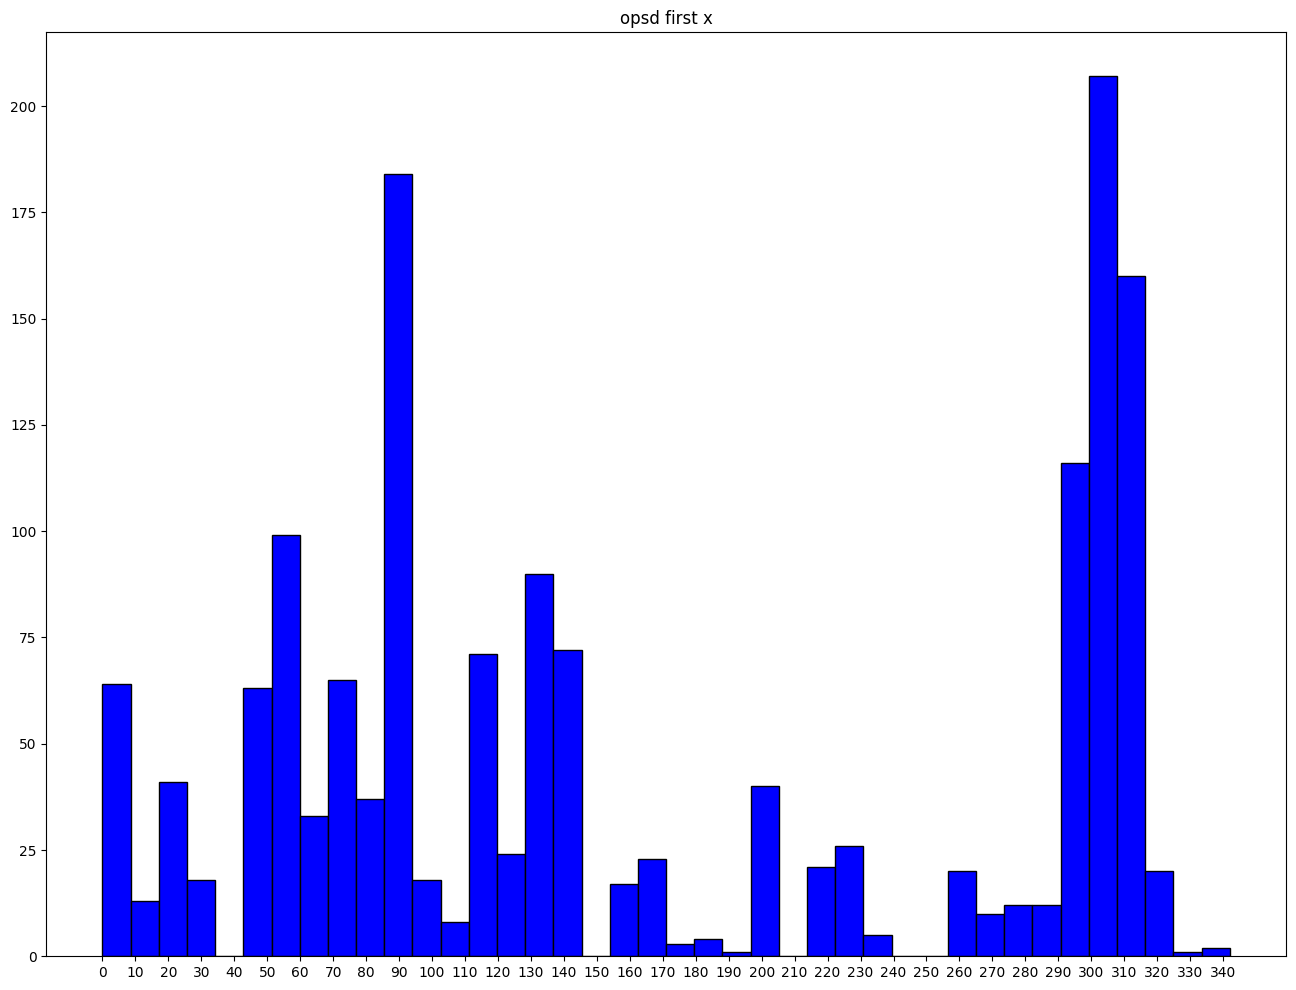

In [ ]:
correlation_index = []

for k in range(16):
  data = np.load(f"/content/drive/MyDrive/GPCRBert/inference result/proteins_NPXXY_(head{k}).npy", allow_pickle=True)
  data = data[index_list]
  # most_cor1 = []
  # most_cor2 = []
  # most_cor3 = []
  # most_cor4 = []
  # most_cor5 = []

  for j in range(data.shape[0]):

      pdb = data[j]['pdb']
      seq = data[j]['seq']
      attention = data[j]['attention']
      try:
        index = [i for i, s in enumerate(seq) if s == 'Y' and seq[i-1]=='J' and seq[i-3]=='P']
        raise IndexError
      except IndexError:
        pass
      #print(f'Data number : {j}')
      #print(f'pdb : {pdb}')
      if type(index) == list:
        index = index[0] - 2 # first X
      else:
        pass
      #if k == 0:
      print(f'Data number : {j}, head number : {k}')
      print(f'pdb : {pdb}')
      print(f'The Index of N of NPXXY is {index-1} in {seq[index-2:index+4]}')

      row = attention[index] # row of first X


      max_index1 = np.argmax(row)
      correlation_index.append(max_index1)
      print(f' Most Correlated sequence is {seq[max_index1]} in {seq[max_index1:max_index1+6]} at Index: {max_index1}. Attention Weight: {row[max_index1]}')
      row[max_index1] = 0

      max_index2 = np.argmax(row)
      correlation_index.append(max_index2)
      print(f' Second Most Correlated sequence is {seq[max_index2]} in {seq[max_index2:max_index2+6]} at Index: {max_index2}. Attention Weight: {row[max_index2]}')
      row[max_index2] = 0

      max_index3 = np.argmax(row)
      correlation_index.append(max_index3)
      print(f' Third Most Correlated sequence is {seq[max_index3]} in {seq[max_index3:max_index3+6]} at Index: {max_index3}. Attention Weight: {row[max_index3]}')
      row[max_index3] = 0

      max_index4 = np.argmax(row)
      correlation_index.append(max_index4)
      print(f' Fourth Most Correlated sequence is {seq[max_index4]} in {seq[max_index4:max_index4+6]} at Index: {max_index4}. Attention Weight: {row[max_index4]}')
      row[max_index4] = 0

      max_index5 = np.argmax(row)
      correlation_index.append(max_index5)
      print(f' Fifth Most Correlated sequence is {seq[max_index5]} in {seq[max_index5:max_index5+6]} at Index: {max_index5}. Attention Weight: {row[max_index5]}')

plt.figure(figsize=(16, 12))
plt.hist(correlation_index, bins=40, color='blue', edgecolor='black')
xtick_positions = np.arange(min(correlation_index), max(correlation_index), 10)
xtick_labels = [str(x) for x in xtick_positions]

plt.title(f'{name_list[choose]} first x')
plt.xticks(xtick_positions, xtick_labels)
plt.show()

In [ ]:
data = np.load(f"/content/drive/MyDrive/GPCRBert/inference result/proteins_NPXXY_(head{k}).npy", allow_pickle=True)
data = data[index_list]


for i in range(data.shape[0]):
  print(len(data[i]['seq']))
  print(data[0]['seq'][15:40])

372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL
372
PKEYEWVLIAGYIIVFVVALIGNVL


### For second X

Data number : 0
pdb : ox1r_human_6TP6_prot.pdb
The Index of N of NPXXY is 331 in PJJYNF
Data number : 1
pdb : ox1r_human_6TQ7_prot.pdb
The Index of N of NPXXY is 331 in PJJYNF
Data number : 2
pdb : ox1r_human_6TQ4_prot.pdb
The Index of N of NPXXY is 330 in PJJYNF
Data number : 3
pdb : ox1r_human_6TOD_prot.pdb
The Index of N of NPXXY is 327 in PJJYNF
Data number : 4
pdb : ox1r_human_6TP4_prot.pdb
The Index of N of NPXXY is 328 in PJJYNF
Data number : 5
pdb : ox1r_human_6TQ6_prot.pdb
The Index of N of NPXXY is 328 in PJJYNF
Data number : 6
pdb : ox1r_human_6TO7_prot.pdb
The Index of N of NPXXY is 326 in PJJYNF
Data number : 7
pdb : ox1r_human_4ZJ8_prot.pdb
The Index of N of NPXXY is 313 in PJJYNF
Data number : 8
pdb : ox1r_human_6V9S_prot.pdb
The Index of N of NPXXY is 313 in PJJYNF
Data number : 9
pdb : ox1r_human_4ZJC_prot.pdb
The Index of N of NPXXY is 312 in PJJYNF
Data number : 10
pdb : ox1r_human_6TOS_prot.pdb
The Index of N of NPXXY is 329 in PJJYNF
Data number : 11
pdb : ox1r_hum

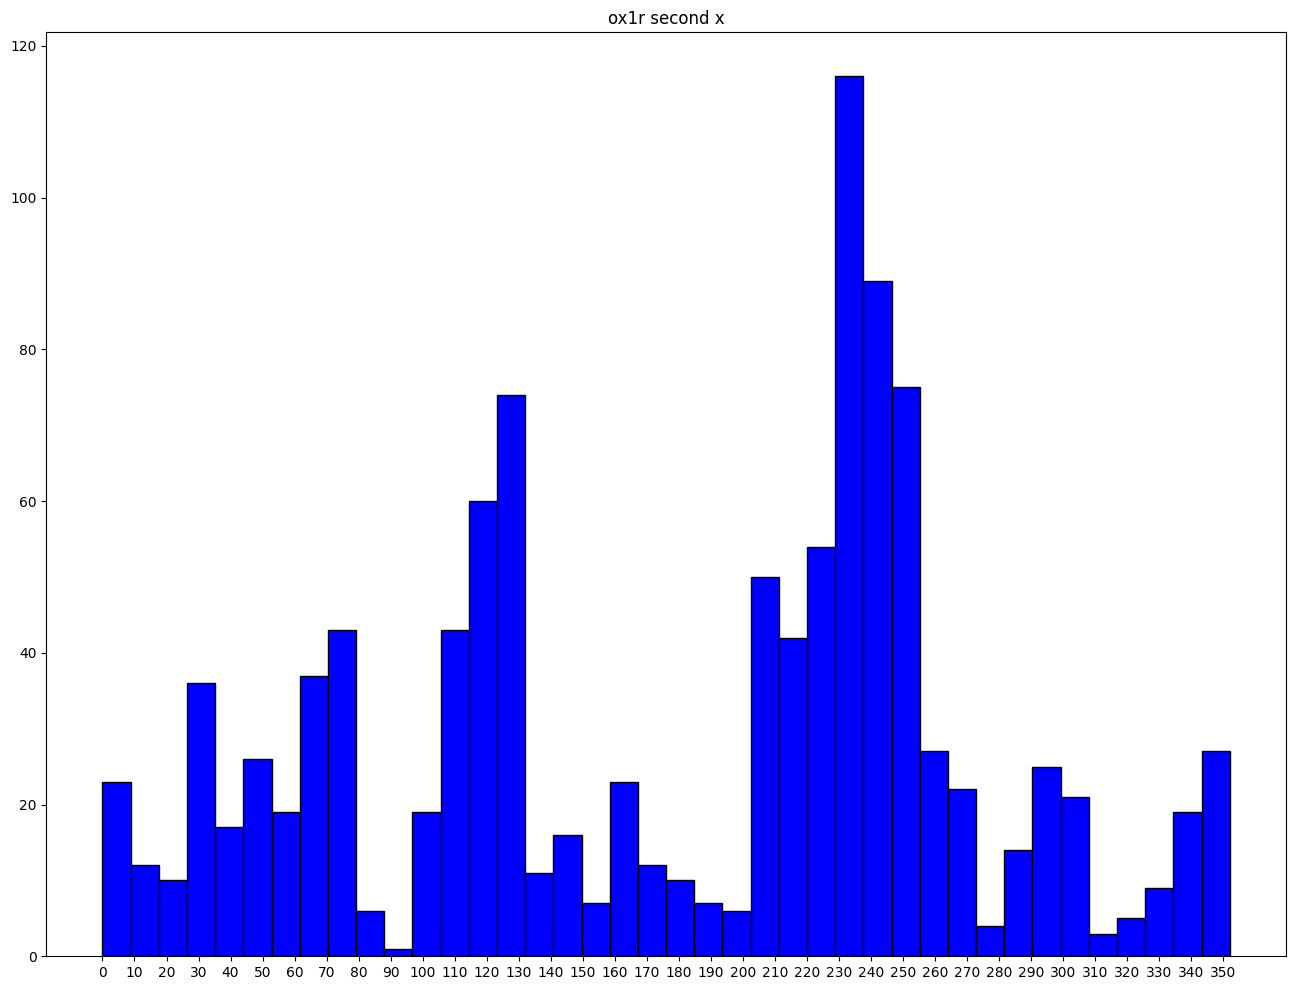

In [ ]:
correlation_index = []

for k in range(16):
  data = np.load(f"/content/drive/MyDrive/GPCRBert/inference result/proteins_NPXXY_(head{k}).npy", allow_pickle=True)
  data = data[index_list]
  # most_cor1 = []
  # most_cor2 = []
  # most_cor3 = []
  # most_cor4 = []
  # most_cor5 = []

  for j in range(data.shape[0]):

      pdb = data[j]['pdb']
      seq = data[j]['seq']
      attention = data[j]['attention']
      try:
        index = [i for i, s in enumerate(seq) if s == 'Y' and seq[i-1]=='J' and seq[i-3]=='P']
        raise IndexError
      except IndexError:
        pass
      #print(f'Data number : {j}')
      #print(f'pdb : {pdb}')
      if type(index) == list:
        index = index[0] - 1 # second X
      else:
        pass
      if k == 0:
        print(f'Data number : {j}')
        print(f'pdb : {pdb}')
        print(f'The Index of N of NPXXY is {index-1} in {seq[index-2:index+4]}')

      row = attention[index] # row of first X


      max_index1 = np.argmax(row)
      correlation_index.append(max_index1)
      #print(f' Most Correlated sequence is {seq[max_index1]} in {seq[max_index1:max_index1+6]} at Index: {max_index1}. Attention Weight: {row[max_index1]}')
      row[max_index1] = 0

      max_index2 = np.argmax(row)
      correlation_index.append(max_index2)
      #print(f' Second Most Correlated sequence is {seq[max_index2]} in {seq[max_index2:max_index2+6]} at Index: {max_index2}. Attention Weight: {row[max_index2]}')
      row[max_index2] = 0

      max_index3 = np.argmax(row)
      correlation_index.append(max_index3)
      #print(f' Third Most Correlated sequence is {seq[max_index3]} in {seq[max_index3:max_index3+6]} at Index: {max_index3}. Attention Weight: {row[max_index3]}')
      row[max_index3] = 0

      max_index4 = np.argmax(row)
      correlation_index.append(max_index4)
      #print(f' Fourth Most Correlated sequence is {seq[max_index4]} in {seq[max_index4:max_index4+6]} at Index: {max_index4}. Attention Weight: {row[max_index4]}')
      row[max_index4] = 0

      max_index5 = np.argmax(row)
      correlation_index.append(max_index5)
      #print(f' Fifth Most Correlated sequence is {seq[max_index5]} in {seq[max_index5:max_index5+6]} at Index: {max_index5}. Attention Weight: {row[max_index5]}')

plt.figure(figsize=(16, 12))
plt.hist(correlation_index, bins=40, color='blue', edgecolor='black')
xtick_positions = np.arange(min(correlation_index), max(correlation_index), 10)
xtick_labels = [str(x) for x in xtick_positions]

plt.title(f'{name_list[choose]} second x')
plt.xticks(xtick_positions, xtick_labels)
plt.show()

### Old code

In [ ]:
weights_and_sequences = np.load("/content/drive/MyDrive/PRotBert/final_NPxxY_weight_and_sequences_pdb.npy", allow_pickle=True)
my_list = range(len(weights_and_sequences))
avoid = [5, 37, 49]
# 5 > still has NPJJ..
# 37 > doenst have NPXXY
# 49 > ?
new_list = [x for i, x in enumerate(my_list) if i not in avoid]

most_cor1 = []
most_cor2 = []
most_cor3 = []
most_cor4 = []
most_cor5 = []
row_index = []


for j in new_list:
    values = list(weights_and_sequences[j].values())
    my_list = values[1]
    try:
      index = [i for i, s in enumerate(my_list) if s == 'P' and my_list[i-1]=='N' and my_list[i+3]=='Y']
      raise IndexError
    except IndexError:
      pass
    print(f'Data number : {j}')
    print(f'pdb : {values[2]}')
    print(f'The Index of P of NPXXY is {index}')
    if type(index) == list:
      index = index[0]
    else:
      pass
    #and my_list[i+3]=='Y'
     # index of X
    row = values[1][index+1] # row of first X


    max_index1 = np.argmax(row)
    most_cor1.append(values[0][max_index1])
    print(f' Most Correlated sequence is {values[0][max_index1]} in {values[0][max_index1:max_index1+6]} at Index: {max_index1}. Attention Weight: {row[max_index1]}')
    row[max_index1] = 0

    max_index2 = np.argmax(row)
    most_cor2.append(values[0][max_index2])
    print(f' Second Most Correlated sequence is {values[0][max_index2]} in {values[0][max_index2:max_index2+6]} at Index: {max_index2}. Attention Weight: {row[max_index2]}')
    row[max_index2] = 0

    max_index3 = np.argmax(row)
    most_cor3.append(values[0][max_index3])
    print(f' Third Most Correlated sequence is {values[0][max_index3]} in {values[0][max_index3:max_index3+6]} at Index: {max_index3}. Attention Weight: {row[max_index3]}')
    row[max_index3] = 0

    max_index4 = np.argmax(row)
    most_cor4.append(values[0][max_index4])
    print(f' Fourth Most Correlated sequence is {values[0][max_index4]} in {values[0][max_index4:max_index4+6]} at Index: {max_index4}. Attention Weight: {row[max_index4]}')
    row[max_index4] = 0

    max_index5 = np.argmax(row)
    most_cor5.append(values[0][max_index5])
    print(f' Fifth Most Correlated sequence is {values[0][max_index5]} in {values[0][max_index5:max_index5+6]} at Index: {max_index5}. Attention Weight: {row[max_index5]}')

    start_index = min(max_index1, max_index2, max_index3, max_index4, max_index5)
    end_index = max(max_index1, max_index2, max_index3, max_index4, max_index5)
    print(f' The sequence between correlated residue is {values[0][start_index:end_index+1]}')

    row_index.append(j)

In [ ]:
weights_and_sequences = np.load("/content/drive/MyDrive/PRotBert/final_NPxxY_weight_and_sequences_pdb.npy", allow_pickle=True)
my_list = range(len(weights_and_sequences))
avoid = [5, 37, 49]
# 5 > still has NPJJ..
# 37 > doenst have NPXXY
# 49 > ?
new_list = [x for i, x in enumerate(my_list) if i not in avoid]

most_cor1 = []
most_cor2 = []
most_cor3 = []
most_cor4 = []
most_cor5 = []
row_index = []


for j in new_list:
    values = list(weights_and_sequences[j].values())
    my_list = values[0]
    try:
      index = [i for i, s in enumerate(my_list) if s == 'P' and my_list[i-1]=='N' and my_list[i+3]=='Y']
      raise IndexError
    except IndexError:
      pass
    print(f'Data number : {j}')
    print(f'pdb : {values[2]}')
    print(f'The Index of P of NPXXY is {index}')
    if type(index) == list:
      index = index[0]
    else:
      pass
    #and my_list[i+3]=='Y'
     # index of X
    row = values[1][index+1] # row of first X


    max_index1 = np.argmax(row)
    most_cor1.append(values[0][max_index1])
    print(f' Most Correlated sequence is {values[0][max_index1]} in {values[0][max_index1:max_index1+6]} at Index: {max_index1}. Attention Weight: {row[max_index1]}')
    row[max_index1] = 0

    max_index2 = np.argmax(row)
    most_cor2.append(values[0][max_index2])
    print(f' Second Most Correlated sequence is {values[0][max_index2]} in {values[0][max_index2:max_index2+6]} at Index: {max_index2}. Attention Weight: {row[max_index2]}')
    row[max_index2] = 0

    max_index3 = np.argmax(row)
    most_cor3.append(values[0][max_index3])
    print(f' Third Most Correlated sequence is {values[0][max_index3]} in {values[0][max_index3:max_index3+6]} at Index: {max_index3}. Attention Weight: {row[max_index3]}')
    row[max_index3] = 0

    max_index4 = np.argmax(row)
    most_cor4.append(values[0][max_index4])
    print(f' Fourth Most Correlated sequence is {values[0][max_index4]} in {values[0][max_index4:max_index4+6]} at Index: {max_index4}. Attention Weight: {row[max_index4]}')
    row[max_index4] = 0

    max_index5 = np.argmax(row)
    most_cor5.append(values[0][max_index5])
    print(f' Fifth Most Correlated sequence is {values[0][max_index5]} in {values[0][max_index5:max_index5+6]} at Index: {max_index5}. Attention Weight: {row[max_index5]}')

    start_index = min(max_index1, max_index2, max_index3, max_index4, max_index5)
    end_index = max(max_index1, max_index2, max_index3, max_index4, max_index5)
    print(f' The sequence between correlated residue is {values[0][start_index:end_index+1]}')

    row_index.append(j)